# 1. DataSet 구성

    1. 일자 : 유동 인구를 수집한 날짜 (2020/04/01 ~ 2020/04/30)
    2. 시간 : 유동 인구를 수집한 시간 (0시 ~ 23시, 1시간 단위 수집)
    3. 연령대 : 유동 인구를 수집한 연령대 (20대 ~ 70대)
    4. 시 : 유동 인구를 수집한 시 (서울시)
    5. 구 : 유동 인구를 수집한 구 (서울 25개 구)
    6. 유동인구수

In [1]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [2]:
# 한글(나눔글꼴) 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10) # 사이즈
plt.rc('font', family='NanumBarunGothic') # 폰트 : 나눔바른고딕

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# font 적용
plt.rc('font', family = 'NanumBarunGothic')

# ggplot 으로 그래프 스타일 설정
plt.style.use('ggplot')

# 레티나 설정 : 글자가 흐릿하게 보이는 현상 방지
%config InlineBackend.figure_format = 'retina'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

%matplotlib inline

# matplotlib 한글 폰트 오류 문제 해결 - Windows
from matplotlib import font_manager, rc
font_path = '/drive/MyDrive/Colab Notebooks/AI1_Ouseoung_Lee/Day18//malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# matplotlib 한글 폰트 오류 문제 해결 - MAC
# from matplotlib import rc
# rc('font', family='AppleGothic')

# IPython Display Setting --> Maximum columns of output
pd.set_option('display.max_columns', 20)    
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.unicode.east_asian_width', True)

import warnings
warnings.filterwarnings('ignore')

# 2. 데이터 수집

- DataFrame 생성
- DataFrame 기본 정보 확인

In [5]:
df = pd.read_csv('/drive/MyDrive/Colab Notebooks/AI1_Ouseoung_Lee/Day18/Floating_Population_2020.csv', 
                  encoding='utf-8')
df.head()

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,20200401,0,20,남성,서울,도봉구,21490
1,20200401,0,30,여성,서울,동대문구,27260
2,20200401,0,50,남성,서울,구로구,35670
3,20200401,1,30,여성,서울,강남구,52380
4,20200401,1,40,남성,서울,동대문구,28420


In [6]:
df.tail()

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
215995,20200430,22,40,여성,서울,성동구,22150
215996,20200430,22,50,여성,서울,서대문구,23270
215997,20200430,23,20,여성,서울,용산구,18570
215998,20200430,23,30,여성,서울,서대문구,21100
215999,20200430,23,40,남성,서울,강남구,45730


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216000 entries, 0 to 215999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   일자          216000 non-null  int64 
 1   시간(1시간단위)   216000 non-null  int64 
 2   연령대(10세단위)  216000 non-null  int64 
 3   성별          216000 non-null  object
 4   시           216000 non-null  object
 5   군구          216000 non-null  object
 6   유동인구수       216000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 11.5+ MB


In [8]:
df.shape

(216000, 7)

In [9]:
df.dtypes

일자                 int64
시간(1시간단위)      int64
연령대(10세단위)     int64
성별                object
시                  object
군구                object
유동인구수           int64
dtype: object

# 3. 데이터 전처리

## 3.1 불필요한 데이터 삭제 : '시'

In [10]:
df.drop('시', axis=1, inplace=True)
df.head()

,일자,시간(1시간단위),연령대(10세단위),성별,군구,유동인구수
0,20200401,0,20,남성,도봉구,21490
1,20200401,0,30,여성,동대문구,27260
2,20200401,0,50,남성,구로구,35670
3,20200401,1,30,여성,강남구,52380
4,20200401,1,40,남성,동대문구,28420


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216000 entries, 0 to 215999
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   일자          216000 non-null  int64 
 1   시간(1시간단위)   216000 non-null  int64 
 2   연령대(10세단위)  216000 non-null  int64 
 3   성별          216000 non-null  object
 4   군구          216000 non-null  object
 5   유동인구수       216000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 9.9+ MB


## 3.2 변수 이름 변경

In [12]:
df.rename(columns={'시간(1시간단위)' : '단위시간', 
                   '연령대(10세단위)' : '연령대', 
                   '군구' : '구'}, inplace=True)
df.head()

,일자,단위시간,연령대,성별,구,유동인구수
0,20200401,0,20,남성,도봉구,21490
1,20200401,0,30,여성,동대문구,27260
2,20200401,0,50,남성,구로구,35670
3,20200401,1,30,여성,강남구,52380
4,20200401,1,40,남성,동대문구,28420


## 3.3 타입 변환

### 3.3.1 범주형으로 변환

In [13]:
df['단위시간'] = df['단위시간'].astype('category')
df['연령대'] = df['연령대'].astype('category')
df['성별'] = df['성별'].astype('category')
df['구'] = df['구'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216000 entries, 0 to 215999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   일자      216000 non-null  int64   
 1   단위시간    216000 non-null  category
 2   연령대     216000 non-null  category
 3   성별      216000 non-null  category
 4   구       216000 non-null  category
 5   유동인구수   216000 non-null  int64   
dtypes: category(4), int64(2)
memory usage: 4.1 MB


### 3.3.2 일자 (정수형 --> 문자형)

In [14]:
df['일자'] = df['일자'].astype('str')
df.dtypes

일자            object
단위시간      category
연령대        category
성별          category
구            category
유동인구수       int64
dtype: object

## 3.4 결측치 확인

In [15]:
df.isnull().sum(axis=0)

일자          0
단위시간      0
연령대        0
성별          0
구            0
유동인구수    0
dtype: int64

## 3.5 이상치 확인

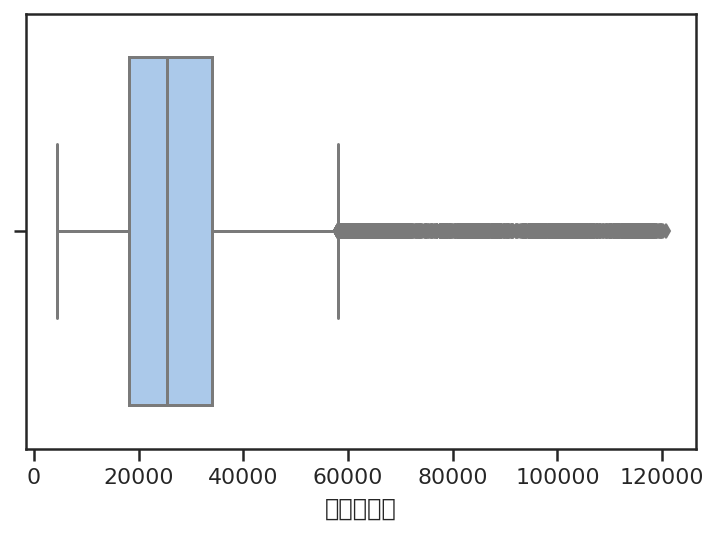

In [16]:
sns.set_theme(style='ticks', palette='pastel')
sns.boxplot(x=df['유동인구수'])

- 이상치에 대한 처리가 의미없음...

# 4. EDA(Exploratory Data Analysis)

## 4.1 조사기간

In [17]:
date_list = list(df.일자.unique())
for i in date_list:
    print(f'{i}')
print(f'\n조사 기간 : 총 {len(date_list)} 일')

20200401
20200402
20200403
20200404
20200405
20200406
20200407
20200408
20200409
20200410
20200411
20200412
20200413
20200414
20200415
20200416
20200417
20200418
20200419
20200420
20200421
20200422
20200423
20200424
20200425
20200426
20200427
20200428
20200429
20200430

조사 기간 : 총 30 일


## 4.2 조사 시간대

In [18]:
time_list = list(df.단위시간.unique())
time_list = sorted(time_list)
for i in time_list:
    print(f'{i}')
print(f'\n조사 시간 : 총 {len(time_list)} 시간')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23

조사 시간 : 총 24 시간


## 4.3 조사 성별

In [19]:
gender_list = list(df.성별.unique())
for i in gender_list:
    print(f'{i}')
print(f'\n조사 성별 : 총 {len(gender_list)} 개')

남성
여성

조사 성별 : 총 2 개


## 4.4 조사 연령

In [20]:
age_list = list(df.연령대.unique())
for i in age_list:
    print(f'{i}')
print(f'\n조사 연령대 : 총 {len(age_list)} 대')

20
30
50
40
70
60

조사 연령대 : 총 6 대


## 4.5 조사 구

In [21]:
region_list = list(df.구.unique())
for i in region_list:
    print(f'{i}')
print(f'\n조사 구 : 총 {len(region_list)} 개 구')

도봉구
동대문구
구로구
강남구
성동구
강서구
금천구
관악구
중랑구
강북구
종로구
영등포구
용산구
광진구
노원구
양천구
중구
마포구
동작구
서대문구
송파구
은평구
강동구
서초구
성북구

조사 구 : 총 25 개 구


## 4.6 EDA를 위한 사용자 정의 함수

In [22]:
def func_aggregate(l, v):
    population = []
    for i in range(len(l)):
        mask = l[i] == v
        result = df.loc[mask]
        population.append(result.유동인구수.sum())
    s = pd.Series(population, index=l)
    return s

# 5. 유동인구 요약 통계

In [23]:
df.describe().round(2)

,유동인구수
count,216000.00
mean,27267.77
std,12480.43
min,4380.00
25%,18070.00
50%,25470.00
75%,34090.00
max,120640.00


## 5.1 2020년 4월 서울시 평균 유동인구 수

In [24]:
print(f'2020년 4월 서울시 평균 유동인구 수 : {round(df.유동인구수.mean(), 2)} 명')

2020년 4월 서울시 평균 유동인구 수 : 27267.77 명


## 5.2 2020년 4월 중 가장 유동인구 수가 많은 날

In [25]:
date_s = func_aggregate(date_list, df.일자)
daily_max = date_s.max()
date = date_s.index[date_s.argmax()]
print(f'[{date[:4]}/{date[4:6]}/{date[6:]}] 총 유동인구 수 : {daily_max} 명')

[2020/04/01] 총 유동인구 수 : 200208500 명


## 5.3 2020년 4월 서울시 일일 최대 유동 날짜, 지역, 유동인구 수

In [26]:
max_population = df.유동인구수.max()
print(f'2020년 4월 서울시 일일 최대 유동인구 수 : {round(max_population, 2)} 명')

2020년 4월 서울시 일일 최대 유동인구 수 : 120640 명


In [27]:
df[df.유동인구수 >= max_population]

,일자,단위시간,연령대,성별,구,유동인구수
98155,20200428,14,30,여성,강남구,120640


## 5.4 2020년 4월 중 가장 유동인구 수가 적은 날

In [28]:
daily_min = date_s.min()
date = date_s.index[date_s.argmin()]
print(f'[{date[:4]}/{date[4:6]}/{date[6:]}] 총 유동인구 수 : {daily_min} 명')

[2020/04/30] 총 유동인구 수 : 186668960 명


## 5.5 2020년 4월 서울시 일일 최소 유동 날짜, 지역, 유동인구 수

In [29]:
min_population = df.유동인구수.min()
print(f'2020년 4월 서울시 일일 최소 유동인구 수 : {round(min_population, 2)} 명')

2020년 4월 서울시 일일 최소 유동인구 수 : 4380 명


In [30]:
df[df.유동인구수 <= min_population]

,일자,단위시간,연령대,성별,구,유동인구수
82486,20200426,3,70,남성,중구,4380


## 5.6 2020년 4월 일자별 유동인구 수

In [31]:
for date in date_list:
    print(f'[{date[:4]}/{date[4:6]}/{date[6:]}] 총 유동인구 수 : \
    {date_s[date]} 명')

[2020/04/01] 총 유동인구 수 :     200208500 명
[2020/04/02] 총 유동인구 수 :     199791200 명
[2020/04/03] 총 유동인구 수 :     199136720 명
[2020/04/04] 총 유동인구 수 :     191161060 명
[2020/04/05] 총 유동인구 수 :     189696320 명
[2020/04/06] 총 유동인구 수 :     199919630 명
[2020/04/07] 총 유동인구 수 :     199803760 명
[2020/04/08] 총 유동인구 수 :     199655110 명
[2020/04/09] 총 유동인구 수 :     199541470 명
[2020/04/10] 총 유동인구 수 :     199091080 명
[2020/04/11] 총 유동인구 수 :     191032010 명
[2020/04/12] 총 유동인구 수 :     189643560 명
[2020/04/13] 총 유동인구 수 :     199241850 명
[2020/04/14] 총 유동인구 수 :     199278710 명
[2020/04/15] 총 유동인구 수 :     192381520 명
[2020/04/16] 총 유동인구 수 :     199059920 명
[2020/04/17] 총 유동인구 수 :     199406670 명
[2020/04/18] 총 유동인구 수 :     190872120 명
[2020/04/19] 총 유동인구 수 :     189951850 명
[2020/04/20] 총 유동인구 수 :     199629090 명
[2020/04/21] 총 유동인구 수 :     199479870 명
[2020/04/22] 총 유동인구 수 :     199512800 명
[2020/04/23] 총 유동인구 수 :     199370110 명
[2020/04/24] 총 유동인구 수 :     199139940 명
[2020/04/25] 총 유동인구 수 :     191227460 명


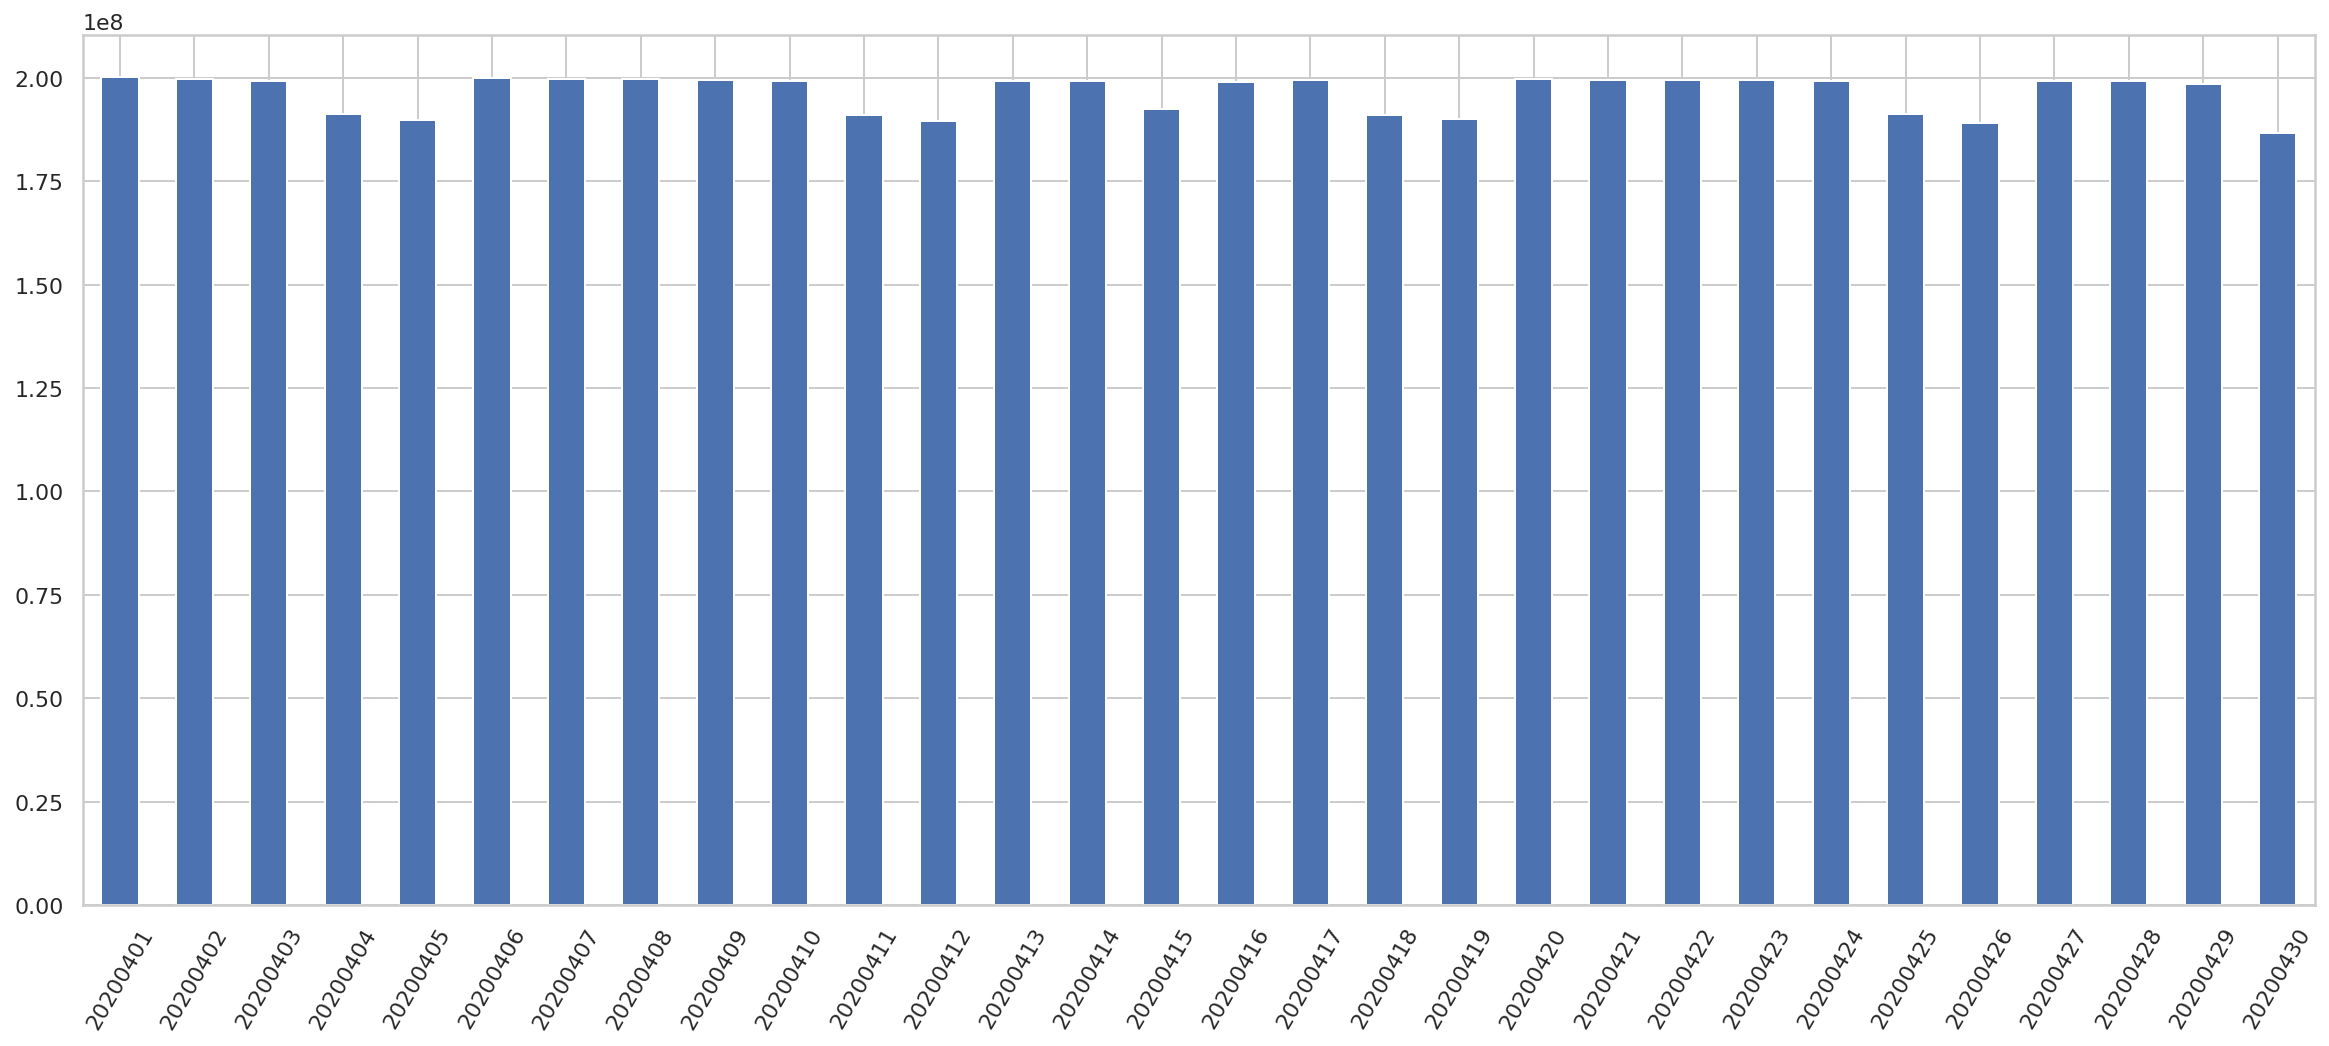

In [32]:
sns.set_theme(style='whitegrid')

ax = date_s.plot(kind='bar', figsize=(20, 8))
ax.set_xticklabels(date_s.index, rotation=60)
plt.show()

## 5.7 2020년 4월 성별 유동인구 수

In [33]:
gender_s = func_aggregate(gender_list, df.성별)
for gender in gender_list:
    print(f'[{gender}] 총 유동인구 : {gender_s[gender]} 명')

[남성] 총 유동인구 : 2851648900 명
[여성] 총 유동인구 : 3038188640 명


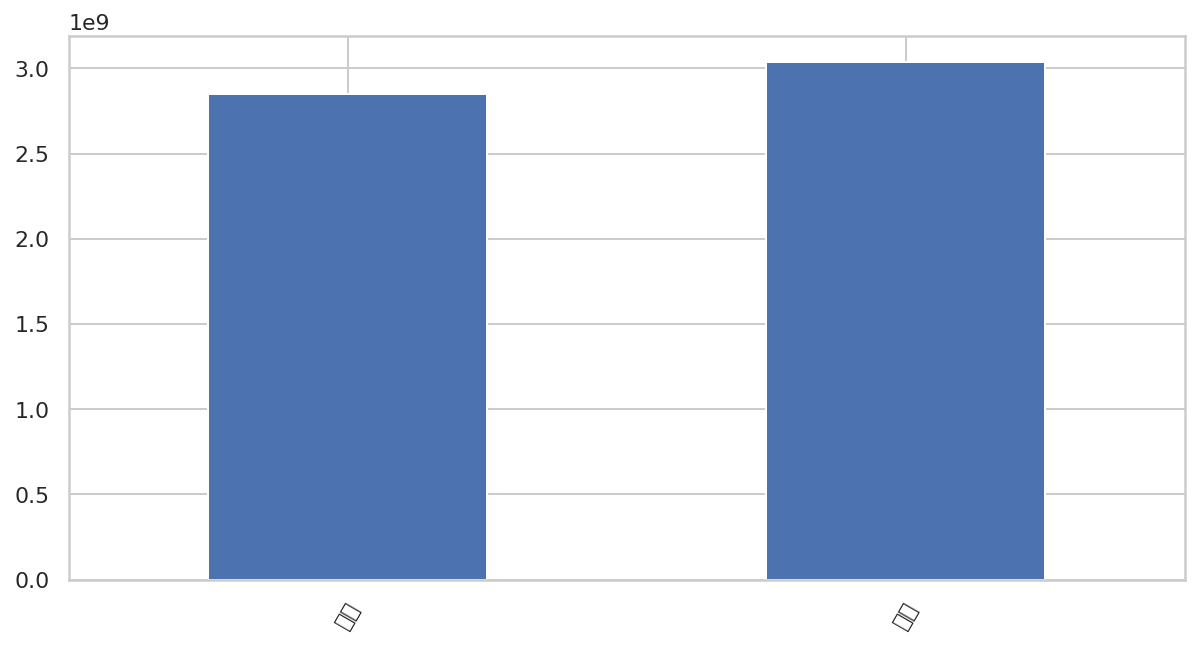

In [34]:
sns.set_theme(style='whitegrid')

ax = gender_s.plot(kind='bar', figsize=(10, 5))
ax.set_xticklabels(gender_s.index, rotation=60)
plt.show()